In [1]:
import pandas as pd
import numpy as np
import glob
import os.path
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
list_of_files=glob.glob('../dell_us_/tmp/*_.txt')
columns=['webpageID','og:type','salestype','country','language',]

df=pd.DataFrame(columns=columns,index=range(len(list_of_files)))

dfword=pd.DataFrame(columns=['webpageID','labels'],index=range(len(list_of_files)))

for i in range(len(list_of_files)):
    dfword.loc[i,'webpageID']=df.loc[i,'webpageID']=os.path.basename(list_of_files[i])[:7]
    word=open(list_of_files[i],'r').read().strip('\n')
    dfword.loc[i,'word']=word
    
    headerfile=list_of_files[i].split('.txt')[0]+'header.txt'
    try:
        f=pd.read_csv(headerfile,header=None,)
    except ValueError:
        continue
    listf=[f.loc[x,0].lower().split(' ') for x in range(f.shape[0])]
    dicf={}
    #for j in listf:
     #   dicf[j[0]]=j[1]
    for j in listf:
        try:
            df.loc[i,j[0]]=j[1]
        except IndexError:
            continue

    
df.head()

,webpageID,og:type,salestype,country,language,categorypath,ui-tabs-panel
0,000004_,category,product_category,us,en,desktops,NaN
1,000006_,category,product_category,us,en,laptops,NaN
2,000007_,category,product_category,us,en,enterprise-products,NaN
3,000009_,category,product_category,us,en,laptops,NaN
4,000011_,category,product_category,us,en,laptops,NaN


['all-products' 'cloud-client-computing' 'deals' 'dell-tablets' 'desktops'
 'document_' 'enterprise-products' 'laptops' 'other-product'
 'server-storage-solutions' 'software' 'unkowntype_']
number of labels is 12


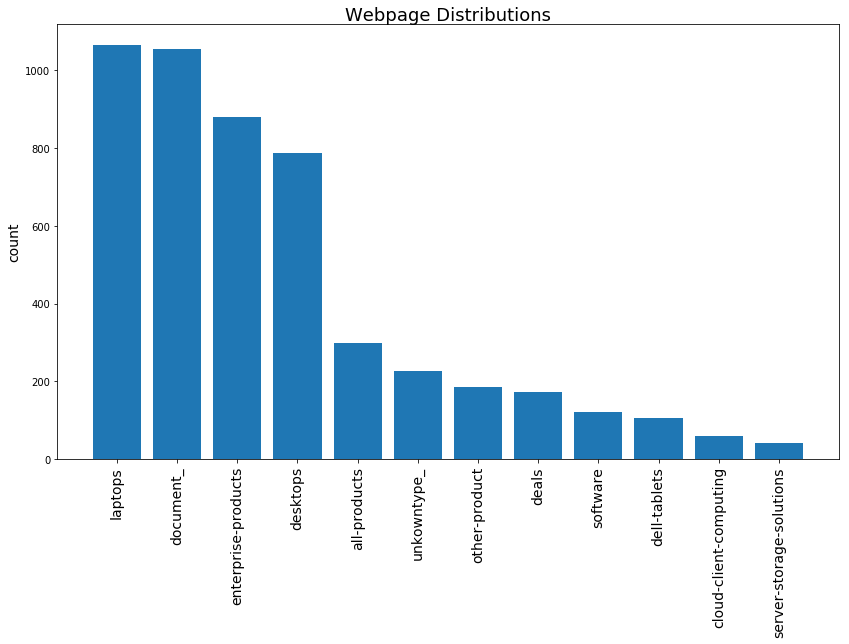

In [3]:
df=df.fillna(' ')
#df.loc[:,'og:type_cpath']=['_'.join((i,j))for i, j in zip(df.loc[:,'og:type'],df.loc[:,'categorypath'])]

#uniquelablef=df.loc[:,'og:type_cpath'].unique()
df.loc[df.loc[:,'og:type']=='document','categorypath']='document_'
df.loc[df.loc[:,'og:type']=='documentsearch','categorypath']='document_'
df.loc[df.loc[:,'og:type']==' ','categorypath']='unkowntype_'
#uniquelablef=df.loc[:,'categorypath'].unique()
for i in range(df.shape[0]):
    if df.loc[i,'categorypath'] not in {'document_','laptops','desktops',
                                        'enterprise-products','unkowntype_','deals','software','dell-tablets',
                                     'server-storage-solutions','cloud-client-computing','all-products'}:
           df.loc[i,'categorypath']='other-product'
    


#print(uniquelablef)
#print('number of labels is {}'.format(len(uniquelablef)))
fig=plt.figure(figsize=(14,8))
labels,labelscount = np.unique(df.loc[:,'categorypath'].values,return_counts=True)
print(labels)
print('number of labels is {}'.format(len(labels)))
indices=np.argsort(labelscount)[::-1]
plt.bar(range(len(labels)),labelscount[indices],align='center')
plt.xticks(range(len(labels)),labels[indices],rotation=90, fontsize=14)
plt.title('Webpage Distributions', fontsize=18)
plt.ylabel('count', fontsize=14)
plt.show()

#for i in range(len(uniquelablef)):
    #df.loc[df.loc[:,'og:type_cpath']==uniquelablef[i],'label']=i
    #df.loc[df.loc[:,'categorypath']==uniquelablef[i],'label'] = int(i)

#df

In [4]:
dfword=dfword.fillna(' ')
dfword.loc[:,'labels']=df.loc[:,'categorypath']
allwords=dfword.loc[:,'word']
dfword.head()

,webpageID,labels,word
0,000004_,desktops,for hours only get tremendous savings up to o...
1,000006_,laptops,for hours only get tremendous savings up to o...
2,000007_,enterprise-products,dell o sign in click to chat or call us shop ...
3,000009_,laptops,for hours only get tremendous savings up to o...
4,000011_,laptops,for hours only get tremendous savings up to o...


In [5]:


stops=stopwords.words("english")
stops.append('dell')

porter= PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

vectorizer = TfidfVectorizer(analyzer='word',stop_words=stops,use_idf=False,
                             tokenizer=None, norm=None, max_features= 200)




In [6]:
words_features = vectorizer.fit_transform(allwords)
words_features = words_features.toarray().astype(int)

key_words = vectorizer.get_feature_names()


In [7]:
dfword=dfword.drop('word',axis=1)
dfword=dfword.join(pd.DataFrame(data=words_features,columns=key_words))
dfword.head()


,webpageID,labels,ac,add,advantage,anzeigen,apply,atom,au,auf,...,votre,vous,vpro,werden,windows,wireless,xeon,xps,zu,zur
0,000004_,desktops,0,0,5,0,7,2,0,0,...,0,0,4,0,9,0,5,17,0,0
1,000006_,laptops,0,0,5,0,7,2,0,0,...,0,0,2,0,6,0,4,23,0,0
2,000007_,enterprise-products,0,0,5,0,1,2,0,0,...,0,0,2,0,0,0,4,0,0,0
3,000009_,laptops,0,0,5,0,7,2,0,0,...,0,0,2,0,6,0,4,23,0,0
4,000011_,laptops,0,0,5,0,7,2,0,0,...,0,0,2,0,6,0,4,23,0,0


In [8]:
dfword.shape

(5000, 202)

In [9]:
df.to_csv('featuretable.csv', index=False)
dfword.to_csv('bagofwords.csv', index=False)
#newdf=pd.read_csv('featuretable.csv')
#newdf.head()

In [10]:
#df.to_csv('featuretable.txt', index=False)

#newdf=pd.read_csv('featuretable.txt')
#newdf.head()